In [53]:
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 70
pd.options.display.max_rows = 20

top10_data_industry = pd.read_csv('top_10.csv', header = None)

del top10_data_industry[8]

#top10_data_industry = pd.melt(top10_data_industry, id_vars=['industry', 'a_weighted_rating', 'a_visibility', 
#    'a_spread', 'a_volume', 'a_time', 'a_length'], value_vars=['score']) # assign score to each location

#top10_data_industry = top10_data_industry.transpose()

top10_data_industry.columns = top10_data_industry.iloc[0] # set column header
top10_data_industry = top10_data_industry.drop(0) # drop duplicated row

#top10_data_industry.pivot_table(index = '')

top10_data_industry.rename(columns={'industry':'thermometer'}, inplace=True)

#top10_data_industry = pd.melt(top10_data_industry, id_vars=['thermometer'], value_vars=['automotive-automotive-other'])
top10_data_industry = top10_data_industry.loc[top10_data_industry['thermometer'] == 'automotive-automotive-other']

del top10_data_industry['thermometer']

#top10_data_industry = pd.melt(top10_data_industry, id_vars=['score'])
#top10_data_industry.rename(columns={0:'thermometer'}, inplace=True)

top10_data_industry

,score,a_weighted_rating,a_visibility,a_spread,a_volume,a_time,a_length
1,0.693456210768852,0.800508673406529,0.0,0.45,0.45,1.0,0.708812260536399
2,0.701797291947439,0.899243370723261,0.0,0.88,0.275,0.285714285714286,0.461538461538462
3,0.721534569224791,0.617104285874213,0.0,0.598076923076923,0.675,1.0,0.459302325581395
4,0.744119642857143,1.0,0.0,0.5,0.475,0.642857142857143,0.736842105263158
5,0.751384668241826,0.996440454544235,0.0,0.348245614035088,0.475,1.0,0.192982456140351
6,0.773063329326596,0.840841115691487,0.0,0.88,0.6,0.821428571428571,0.628571428571429
7,0.774763680197793,0.84931235014502,0.0,0.88,0.65,1.0,0.75
8,0.788172184460592,0.907483908788999,0.0,0.561494252873563,0.575,1.0,0.617391304347826
9,0.808466405465495,0.963082229444482,0.0,0.462857142857143,0.57,1.0,0.280898876404494
10,0.845101989662417,0.964802336509867,0.0,0.653333333333333,0.67,1.0,0.425287356321839


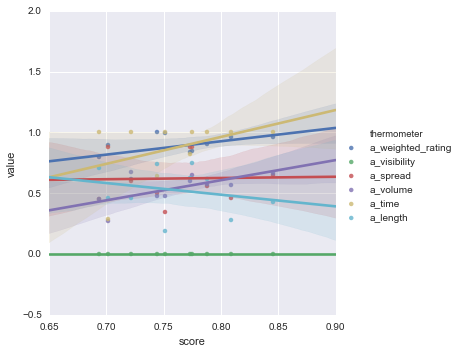

In [52]:
import matplotlib.pyplot as plt

top10_data_industry['score'] = top10_data_industry['score'].astype(float)
top10_data_industry['value'] = top10_data_industry['value'].astype(float)
#sns.lmplot(x="score", y="value", hue="thermometer", data=top10_data_industry)
sns.regplot(x="score", y="value", hue="thermometer", data=top10_data_industry)

In [ ]:
import matplotlib.pyplot as plt

prev = None # print unique columns

for column in top10_data_industry:
    if column != "cat" and column != "thermometer" and column != prev:
        print column
        prev = column
        temp = pd.melt(top10_data_industry, id_vars=['thermometer', 'cat'], value_vars=[column])
        temp100 = pd.melt(top100_data_industry, id_vars=['thermometer', 'cat'], value_vars=[column])
        result = temp.append(temp100)
        result['value'] = result['value'].astype(float)
        sns.set()
        sns.set_context("paper")
        sns.boxplot(x="thermometer", y="value", hue='cat', data=result)
        plt.show()